In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


def hw6(n=1000):
    # Toy dataset from page 339 in ESL
    #np.random.seed(1)
    X=np.random.randn(2*n,10)
    y=2*(np.sum(X**2,axis=1)>9.34)-1
    return X,y

def AdaBoostM1(X_train,y_train,X_test,y_test,M,max_ln=2):
    n=X_train.shape[0]
    n2=X_test.shape[0]
    w=np.ones(n)/n
    G_train = np.zeros((n,M))
    G_test = np.zeros((n2,M))
    GG_train = np.zeros((n,M))
    GG_test = np.zeros((n2,M))
    
    for m in range(M):
        G=DecisionTreeClassifier(max_leaf_nodes=max_ln)
        G.fit(X_train,y_train,sample_weight=w)
        y_train_pred = G.predict(X_train)
        I = y_train != y_train_pred
        err= w*I
        error = sum(err)/sum(w)
        if error == 0:
            break
        a = np.log((1-error)/error)
        w = w*np.exp(a*I)
        G_train[:,m] = a*G.predict(X_train)
        G_test[:,m] = a*G.predict(X_test)
        GG_train[:,m] = np.sum(G_train[:,:m],axis=1)
        GG_test[:,m] = np.sum(G_test[:,:m],axis=1)
    
    
    return GG_train, GG_test

X_train,y_train = hw6(n=1000)
X_test,y_test = hw6(n=10000)
n=X_train.shape[0]
n2=X_test.shape[0]
M=1000
trainError=np.zeros(M-1)
testError=np.zeros(M-1)
G_train,G_test = AdaBoostM1(X_train,y_train,X_test,y_test,M)
for m in range(M):
    y_train_pred = np.sign(G_train[:,m])
    y_test_pred = np.sign(G_test[:,m])
    error_train = y_train_pred != y_train
    error_test = y_test_pred != y_test
    trainError[m] = np.abs(sum(error_train))/(n)
    testError[m] = np.abs(sum(error_test))/(n2)
    
    

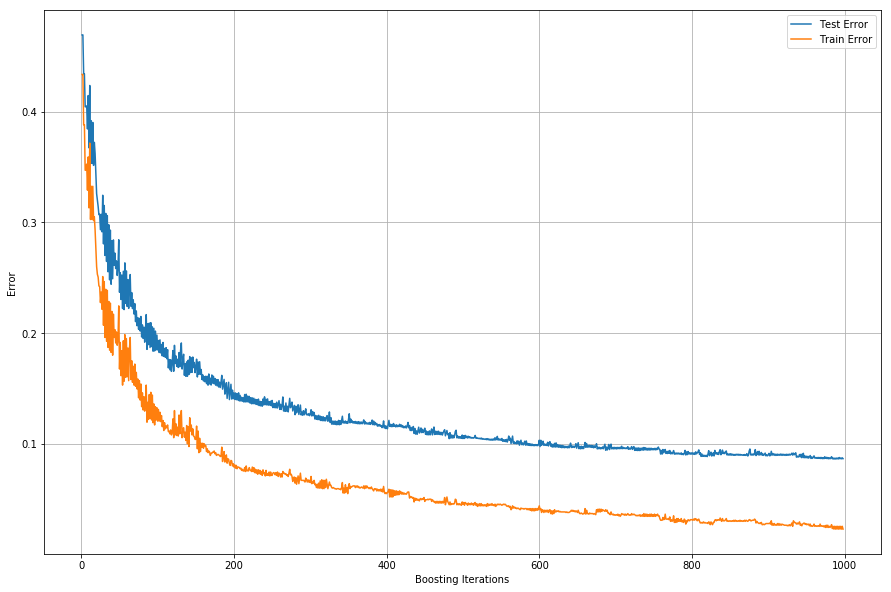

In [64]:
#Plottum myndina:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,M-1),testError[1:M],label='Test Error')
plt.plot(np.arange(1,M-1),trainError[1:M],label='Train Error')
plt.grid()
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.legend()